# Lab 2

## Complete implementation of class kNN for tasks B, C, and D.

### Tests on the glass data without normalization  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# No Normalization Experiments
##################################################

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

#k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

k_range = [1, 3, 5, 7, 9, 11]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy: No normalization')


### Tests on the glass data with normalization  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Experiments with Normalization
##################################################

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

#k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

k_range = [1, 3, 5, 7, 9, 11]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    X_test = clf.normalize(X_test)
    X_train = clf.normalize(X_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy: Normalization')


#### B. Answer 1: Normalization does change the results. For the glass data on the current hold-out split, however, it does not improve the test accuracy. Moreover, the kNN classifiers overfits for a longer range of k. 

In [ ]:
# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))


index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy: Minkowski exponent dependency')


#### B. Answer 2:  The training and hold-out accuracy rates change  with the exponent because it changes the distances between the instances. Note that the exponent can cause  feature selection in a unsupervised manner. The higher is the value of the exponent, the more features are removed. Since this happens without the class information, the accuracy rates can go in any direction.


### C. Test code for the getClassProbs method.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

clf = kNN(k=3)
clf.fit(X,Y)
Probs = clf.getClassProbs(X)
print(Probs)

[tested_positive    1.0
Name: class, dtype: float64, tested_negative    0.666667
tested_positive    0.333333
Name: class, dtype: float64, tested_positive    0.666667
tested_negative    0.333333
Name: class, dtype: float64, tested_negative    1.0
Name: class, dtype: float64, tested_positive    0.666667
tested_negative    0.333333
Name: class, dtype: float64, tested_negative    0.666667
tested_positive    0.333333
Name: class, dtype: float64, tested_negative    0.666667
tested_positive    0.333333
Name: class, dtype: float64, tested_positive    0.666667
tested_negative    0.333333
Name: class, dtype: float64, tested_positive    0.666667
tested_negative    0.333333
Name: class, dtype: float64, tested_negative    0.666667
tested_positive    0.333333
Name: class, dtype: float64, tested_negative    1.0
Name: class, dtype: float64, tested_positive    1.0
Name: class, dtype: float64, tested_positive    0.666667
tested_negative    0.333333
Name: class, dtype: float64, tested_negative    0.66666

### D. Test code for the getPrediction method.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Text(0, 0.5, 'MAE Errors')

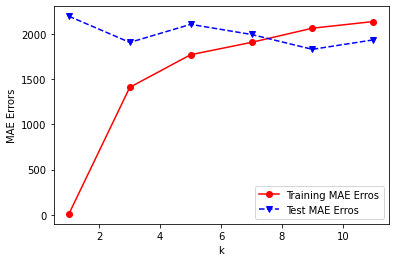

In [4]:
from sklearn.metrics import mean_absolute_error

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN

#k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

k_range = [1, 3, 5, 7, 9, 11]

trainErrors = np.zeros(len(k_range))
testErrors = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    X_test = clf.normalize(X_test)
    X_train = clf.normalize(X_train)
    Y_predTrain = clf.getPrediction(X_train)
    Y_predTest = clf.getPrediction(X_test)
    trainErrors[index] = mean_absolute_error(Y_train, Y_predTrain)
    testErrors[index] = mean_absolute_error(Y_test, Y_predTest)
    index += 1
   
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(k_range,trainErrors,'ro-',k_range,testErrors,'bv--')
plt.legend(['Training MAE Erros','Test MAE Erros'])
plt.xlabel('k')
plt.ylabel('MAE Errors')
